# Project Description
Analyse global COVID 19 data to understand the spread of the virus, examine growth rat compare the impact across different countries. By using data visualization techniques, you will create visual representations of the data to identify hotspots, analyse the effectiveness of miligation measures, and gain insights into the pandemic's impact. example, you might compare Infection rates in different regions track changes in mortality rates time. This project will provide you with hands-on experience in data exploration, visualization, and analysing real-world health data.

# Installing all the library files

In [22]:
pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


# Loading the Dataset

In [12]:
import pandas as pd

url = 'data.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Display the column names
print(data.columns)

# Check for missing values
print(data.isnull().sum())


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

# Data Analysis

In [17]:
# Identify date columns by excluding the non-date columns
non_date_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
date_columns = [col for col in data.columns if col not in non_date_columns]

# Convert date columns to numeric, coercing errors to NaN
data[date_columns] = data[date_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'Country/Region' and sum the cases for all dates
country_data = data.groupby('Country/Region')[date_columns].sum()

# Calculate total cases for each country by summing all date columns
total_cases = country_data.sum(axis=1).reset_index()
total_cases.columns = ['Country/Region', 'Total Cases']

# Display the top 10 countries by total cases
print(total_cases.sort_values(by='Total Cases', ascending=False).head(10))


     Country/Region  Total Cases
186              US  53813184406
80            India  29131119694
24           Brazil  21182690594
63           France  16105911886
67          Germany  13686043720
190  United Kingdom  12118271679
147          Russia  10578569842
86            Italy  10083161678
184          Turkey   8840742699
94     Korea, South   8467888968


# Data Visualization


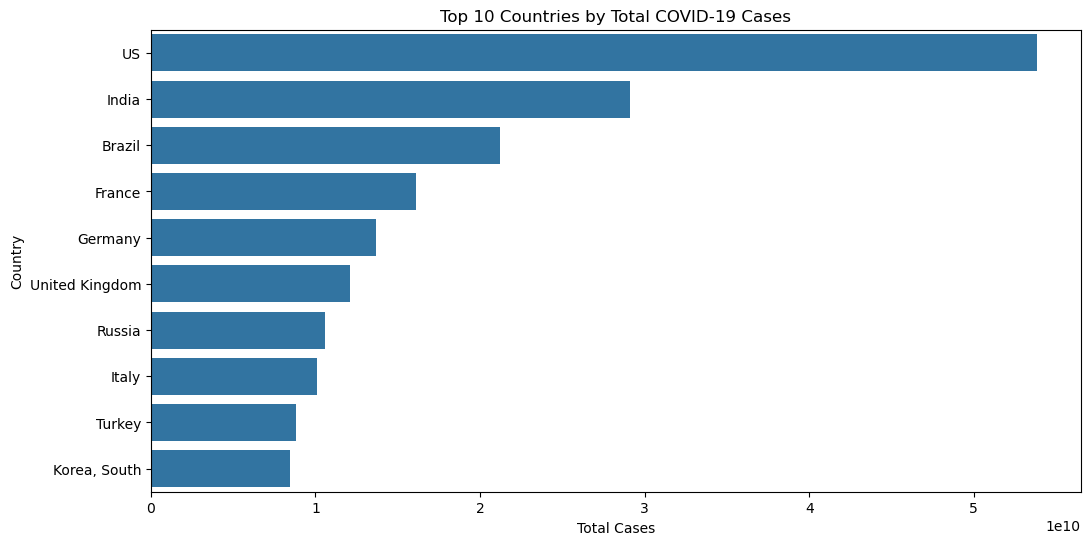

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_countries = total_cases.sort_values(by='Total Cases', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Cases', y='Country/Region', data=top_10_countries)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()


/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_385/529425661.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_melted['Date'] = pd.to_datetime(data_melted['Date'])


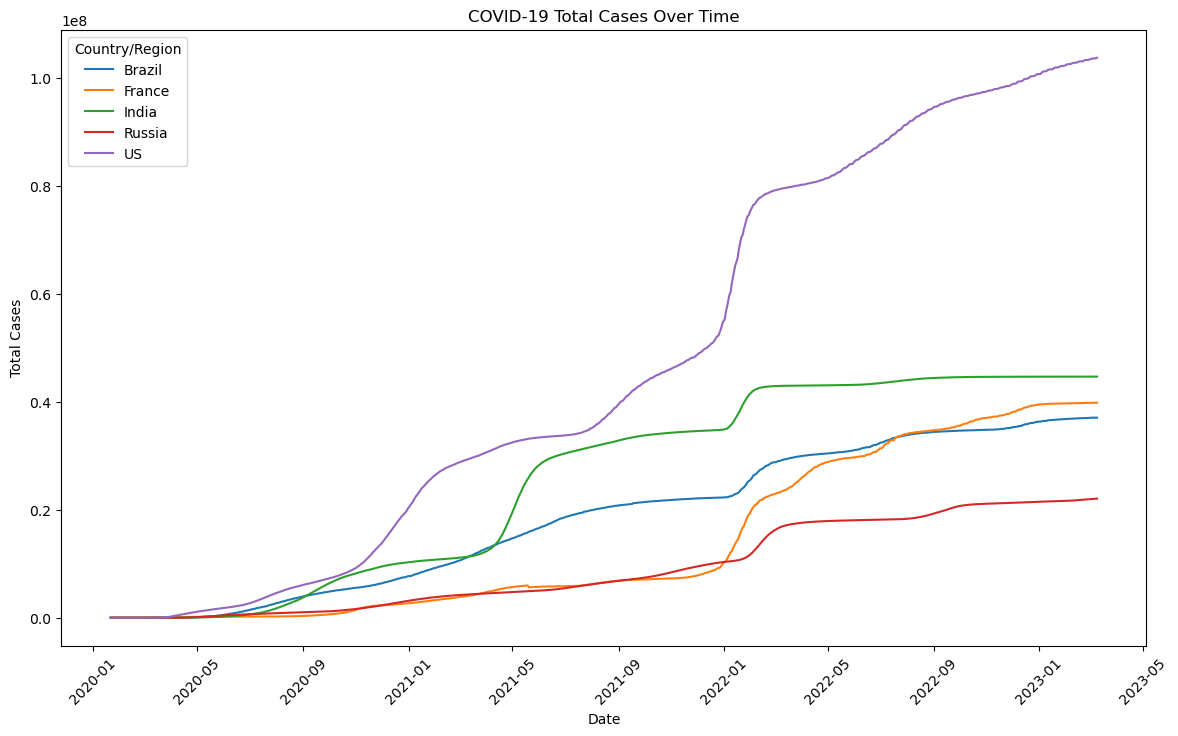

In [21]:
# Select countries for trend analysis
countries = ['US', 'India', 'Brazil', 'Russia', 'France']

# Melt the data for easier plotting
data_melted = data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                        var_name='Date', value_name='Cases')

# Convert 'Date' column to datetime
data_melted['Date'] = pd.to_datetime(data_melted['Date'])

# Filter data for selected countries
df_selected = data_melted[data_melted['Country/Region'].isin(countries)]

# Aggregate cases by date and country
df_selected_agg = df_selected.groupby(['Date', 'Country/Region'])['Cases'].sum().reset_index()

# Plot infection rates over time for selected countries
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Cases', hue='Country/Region', data=df_selected_agg)
plt.title('COVID-19 Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()
